Generamos un polinómio
$$y = x^3-3x^2+2x+1 +\epsilon$$

donde $$\epsilon = {\cal N}(0,\sigma^2)$$

Con

$$0\leq x\leq 3$$
$$\sigma^2=0.1$$

Número de muestras $N=12$

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [56]:
def pol(x):
 y = x**3-3*x**2+2*x+1
 return y

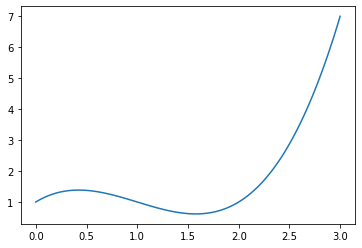

In [57]:
xr = np.linspace(0,3,100)
yr = pol(xr)
plt.plot(xr,yr)

#1.- Gereramos los datos

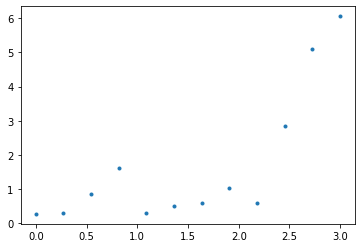

In [58]:
N = 12
sigma = 0.5
x = np.linspace(0,3,N)
eps = stats.norm.rvs(0,np.sqrt(sigma),size=N)
y = pol(x)+eps

plt.plot(x,y,'.')


In [59]:
class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

In [60]:
modelo = PolynomialRegression(deg=3)
modelo.fit(x,y)
modelo.coef_

array([ 0.92862584, -2.9282666 ,  2.56165548,  0.17619924])

#2.- Modelo sobreajustado

Text(0, 0.5, 'y')

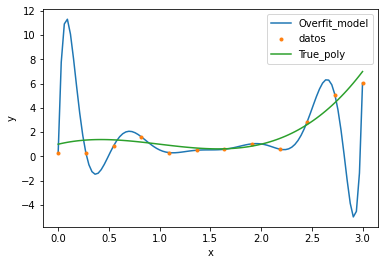

In [81]:
modelo_sobre_ajustado = PolynomialRegression(deg=N-1)
modelo_sobre_ajustado.fit(x,y)

x_tst = np.linspace(0,3,100)
y_tst =modelo_sobre_ajustado.predict(x_tst)

plt.plot(x_tst,y_tst,label='Overfit_model')
plt.plot(x,y,'.', label='datos')
plt.plot(xr,yr,label='True_poly')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

##3.- Modelo subajustado

Text(0, 0.5, 'y')

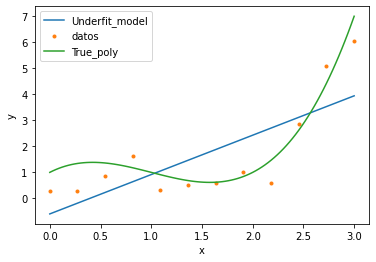

In [78]:
modelo_sub_ajustado = PolynomialRegression(deg=1)
modelo_sub_ajustado.fit(x,y)

x_tst = np.linspace(0,3,100)
y_tst =modelo_sub_ajustado.predict(x_tst)

plt.plot(x_tst,y_tst,label='Underfit_model')
plt.plot(x,y,'.', label='datos')
plt.plot(xr,yr,label='True_poly')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

##4.- Validación cruzada

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

estimador = PolynomialRegression()
degrees = np.arange(1,25)
cv_model = GridSearchCV(estimador, 
                        param_grid={'deg':degrees},
                        scoring='neg_mean_squared_error' )
cv_model.fit(x,y)


GridSearchCV(cv=None, error_score=nan, estimator=PolynomialRegression(deg=None),
             iid='deprecated', n_jobs=None,
             param_grid={'deg': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [74]:
cv_model.best_params_

{'deg': 4}

In [77]:
cv_model.best_estimator_.coef_

array([-2.74407330e-01,  2.57506982e+00, -6.02190956e+00,  4.43358648e+00,
        4.43326529e-03])

Text(0, 0.5, 'y')

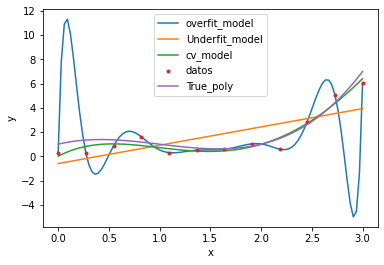

In [82]:
y_tst_over =modelo_sobre_ajustado.predict(x_tst)
y_tst_sub =modelo_sub_ajustado.predict(x_tst)
y_tst_cv = cv_model.predict(x_tst)
plt.plot(x_tst,y_tst_over,label='overfit_model')
plt.plot(x_tst,y_tst_sub,label='Underfit_model')
plt.plot(x_tst,y_tst_cv,label='cv_model')
plt.plot(x,y,'.', label='datos')
plt.plot(xr,yr,label='True_poly')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')